In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Experimentos


#### Generando Data frame

In [10]:
df_concurrente_con_rep_102400 = pd.read_csv("output_concurrente/salida-conRepetidos-102400.txt.csv");
df_concurrente_con_rep_204800 = pd.read_csv("output_concurrente/salida-conRepetidos-204800.txt.csv");
df_concurrente_con_rep_409600 = pd.read_csv("output_concurrente/salida-conRepetidos-409600.txt.csv");

df_secuencial_con_rep_102400 = pd.read_csv("output_secuencial/salida-conRepetidos-102400.txt.csv");
df_secuencial_con_rep_204800 = pd.read_csv("output_secuencial/salida-conRepetidos-204800.txt.csv");
df_secuencial_con_rep_409600 = pd.read_csv("output_secuencial/salida-conRepetidos-409600.txt.csv");

#Agregando columna de metodos
metodo_maximo = []
metodo_maximo_paralelo = []
for i in range(0,26):
    metodo_maximo.append('max')
    metodo_maximo_paralelo.append('max_par')
#Agregando columna de tamaños
tamaño1 = []
tamaño2 = []
tamaño3 = []
for i in range(0,26):
    tamaño1.append('102400')
    tamaño2.append('204800')
    tamaño3.append('409600')



df_concurrente_con_rep_102400['metodo'] = metodo_maximo_paralelo
df_concurrente_con_rep_102400['size'] = tamaño1
df_concurrente_con_rep_204800['metodo'] = metodo_maximo_paralelo
df_concurrente_con_rep_204800['size'] = tamaño2
df_concurrente_con_rep_409600['metodo'] = metodo_maximo_paralelo
df_concurrente_con_rep_409600['size'] = tamaño3
df_secuencial_con_rep_102400['metodo'] = metodo_maximo
df_secuencial_con_rep_102400['size'] = tamaño1
df_secuencial_con_rep_204800['metodo'] = metodo_maximo
df_secuencial_con_rep_204800['size'] = tamaño2
df_secuencial_con_rep_409600['metodo'] = metodo_maximo
df_secuencial_con_rep_409600['size'] = tamaño3
print(df_concurrente_con_rep_102400)
print(df_secuencial_con_rep_102400)

FileNotFoundError: [Errno 2] No such file or directory: 'output_concurrente/salida-conRepetidos-102400.txt.csv'

In [6]:
df_comparciones = pd.concat([df_concurrente_con_rep_102400, df_secuencial_con_rep_102400,df_concurrente_con_rep_204800,df_secuencial_con_rep_204800,df_concurrente_con_rep_409600,df_secuencial_con_rep_409600])
fig = sns.scatterplot(data=df_comparciones, x='thread_maximo', y='tiempo_mediana',palette="deep", hue='metodo',size="size");
fig.set(xlabel='Threads', ylabel='Tiempo');
plt.savefig("102400.svg");

NameError: name 'df_concurrente_con_rep_102400' is not defined

### Experimento 1: Maximo Concurrente vs Maximo Secuencial

In [7]:
df_102400 = pd.concat([df_concurrente_con_rep_102400, df_secuencial_con_rep_102400], axis=0, ignore_index=True)
sns.relplot(data=df_102400 ,x="thread_maximo", y="tiempo_mediana",hue="metodo", kind="line")
plt.show()

NameError: name 'df_concurrente_con_rep_102400' is not defined

In [8]:
df_204800 = pd.concat([df_concurrente_con_rep_204800, df_secuencial_con_rep_204800], axis=0, ignore_index=True)
sns.relplot(data=df_204800 ,x="thread_maximo", y="tiempo_mediana", kind="line",hue="metodo")
plt.show()

NameError: name 'df_concurrente_con_rep_204800' is not defined

ValueError: cannot reindex from a duplicate axis

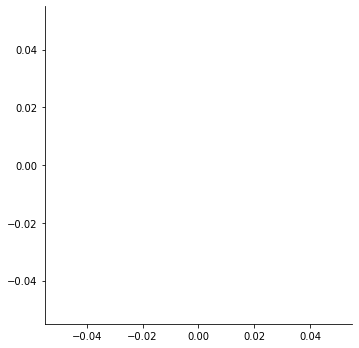

In [6]:
df_409600 = pd.concat([df_concurrente_con_rep_409600, df_secuencial_con_rep_409600], axis=0, ignore_index=True)
sns.relplot(data=df_409600 ,x="thread_maximo", y="tiempo_mediana", kind="line",hue="metodo")
plt.show()

### Experimento 2: CargadeArchivosParalelo vs CargaDeArchivos Secuencial

En este experimento vamos a evaluar el tiempo de ejecución que tomara la carga de archivos.

Tanto de manera secuencial como de manera paralela.

In [7]:
df_salida_concurrente = pd.read_csv("salida-carga/salida-threads-lectura-con-concurrencia.csv");
df_salida_no_concurrente = pd.read_csv("salida-carga/salida-threads-lectura-sin-concurrencia.csv");

In [8]:
df_salida_concurrente.head()

,threads_lectura,thread_maximo,tiempo,output
0,1,1,1.13368,ninguno=0
1,2,2,1.25988,ninguno=0
2,3,3,4.90426,ninguno=0
3,4,4,8.05027,ninguno=0
4,5,5,13.00670,ninguno=0


In [9]:
df_salida_no_concurrente.head()

,threads_lectura,thread_maximo,tiempo,output
0,1,1,0.092863,a6Dp3=19
1,2,2,0.127864,a6Dp3=19
2,3,3,0.128295,aZVek=19
3,4,4,0.197464,aZBC6=19
4,5,5,0.210862,axf6c=19


ValueError: cannot reindex from a duplicate axis

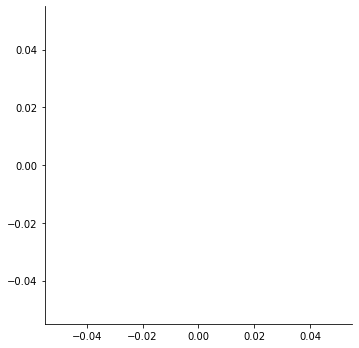

In [10]:
df_salida = pd.concat([df_salida_concurrente, df_salida_no_concurrente], axis=0, ignore_index=True)
sns.relplot(data=df_salida ,x="threads_lectura", y="tiempo", kind="line")
plt.show()